In [77]:
from __future__ import absolute_import, division, print_function, unicode_literals
import mnist_reader
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [78]:
# Loading data from Fashino-MNIST datatset
X_train, Y_train = mnist_reader.load_mnist('/Users/sanidhya/Downloads/data_with_notebook/scripts/data/fashion', kind='train')
X_test, Y_test = mnist_reader.load_mnist('/Users/sanidhya/Downloads/data_with_notebook/scripts/data/fashion', kind='t10k')
X_train_original = X_train
X_test_original = X_test
Y_train_original = Y_train
Y_test_original = Y_test

# Preprocessing
X = X_train/255
X_test = X_test/255

In [ ]:
# Part 1: Neural network with one hidden layer.

In [79]:
# Reshaping for computation
categories = 10
samples = Y_train.shape[0]
Y = Y_train.reshape(1, samples)

Y_new = np.eye(categories)[Y_train.astype('int32')]
Y_new = Y_new.T.reshape(categories, samples)

In [80]:
# Reshaping for computation
m = 60000

Y_test = Y_test.reshape(1,Y_test.shape[0])

Y_new_test = np.eye(categories)[Y_test.astype('int32')]
Y_new_test = Y_new_test.T.reshape(categories, Y_test.shape[1])

In [81]:
# Sigmoid function definition
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [82]:
# Function to compute loss
def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

Epoch 0 cost:  10.198656813384126
Epoch 100 cost:  0.8687736662568845
Epoch 200 cost:  0.741278879869285
Epoch 300 cost:  0.6824247589557478
Epoch 400 cost:  0.6427931061218168
Epoch 500 cost:  0.6009369190785295
Epoch 600 cost:  0.5662089646017558
Epoch 700 cost:  0.544175513284782
Epoch 800 cost:  0.5206173444879406
Epoch 900 cost:  0.50532628685973
Final cost: 0.4673554227049462


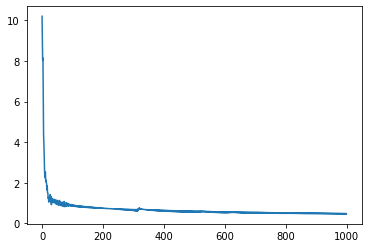

In [83]:
n_x = X.T.shape[0]
n_h = 70
learning_rate = 2

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(categories, n_h)
b2 = np.zeros((categories, 1))

X = X.T
Y = Y_new

losstrack = list()

for i in range(1000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_loss(Y, A2)
    losstrack.append(np.squeeze(cost))

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)
plt.plot(losstrack)
plt.show()

In [84]:
Z1 = np.matmul(W1, X_test.T) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_new_test, axis=0)
predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_new_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[876   6  27  60   3   0 267   0  10   0]
 [  3 940   1  21   1   1   0   0   0   0]
 [ 22   9 769  22 139   0 200   0  18   0]
 [ 56  34   9 820  35   0  46   0   5   1]
 [ 11   5 167  62 795   0 199   0   7   0]
 [  1   0   1   0   3 902   1  38   9  20]
 [ 15   2  15  11  15   0 250   0   5   0]
 [  0   0   0   0   0  57   0 903   6  54]
 [ 16   4  10   4   9   7  37   2 939   0]
 [  0   0   1   0   0  33   0  57   1 925]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1249
           1       0.94      0.97      0.96       967
           2       0.77      0.65      0.71      1179
           3       0.82      0.82      0.82      1006
           4       0.80      0.64      0.71      1246
           5       0.90      0.93      0.91       975
           6       0.25      0.80      0.38       313
           7       0.90      0.89      0.89      1020
           8       0.94      0.91      0.93      1028
           9       0.93     

In [85]:
#Part 2 : Multi-layer neural network

In [86]:
# Reshaping input data for keras
w, h = 28, 28
X_train_2 = X_train_original.reshape(X_train_original.shape[0], w, h)
X_test_2 = X_test_original.reshape(X_test_original.shape[0], w, h)
Y_train_2 = Y_train_original
Y_test_2 = Y_test_original.reshape(Y_test.shape[1],)

In [87]:
# Preprocessing
X_train_2 = X_train_2/255
X_test_2 = X_test_2/255

In [88]:
# Building a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [89]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
# Training the model
history = model.fit(X_train_2, Y_train_2.T, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5460 - accuracy: 0.8075
Epoch 2/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3802 - accuracy: 0.8615
Epoch 3/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3397 - accuracy: 0.8767
Epoch 4/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3182 - accuracy: 0.8821
Epoch 5/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2985 - accuracy: 0.8895
Epoch 6/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2806 - accuracy: 0.8953
Epoch 7/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2674 - accuracy: 0.8988
Epoch 8/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2520 - accuracy: 0.9070
Epoch 9/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2443 - accuracy: 0.9083
Epoch 10/15
60

In [91]:
# Computing accuracy for the test data
test_acc = model.evaluate(X_test_2,  Y_test_2, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2458 - accuracy: 0.8882

Test accuracy: [0.3233659418106079, 0.8882]


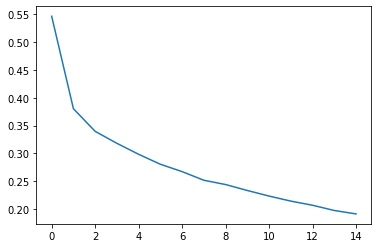

In [92]:
plt.plot(history.history['loss'])

In [93]:
y_pred = model.predict_classes(X_test_2)
con_mat = tf.math.confusion_matrix(labels = Y_test_2, predictions = y_pred).numpy()

In [94]:
print(con_mat)

[[868   1  11  27   7   0  79   0   7   0]
 [  3 976   0  15   4   0   2   0   0   0]
 [ 21   0 808  13 105   0  53   0   0   0]
 [ 17   5  15 898  42   0  18   0   5   0]
 [  0   0  90  21 866   0  21   0   2   0]
 [  0   0   0   1   0 967   0  16   2  14]
 [142   0  75  31 107   0 635   0  10   0]
 [  0   0   0   0   0  24   0 961   0  15]
 [  5   0   4   2   2   4   2   4 977   0]
 [  0   0   0   0   0   6   1  67   0 926]]


In [95]:
accuracy_2 = accuracy_score(Y_test_2, y_pred)
print(accuracy_2)

0.8882


In [96]:
#Part 3 : Convolutional neural network

In [97]:
# Preprocessing
X_train_3 = X_train_original.astype('float32') / 255
X_test_3 = X_test_original.astype('float32') / 255
Y_train_3 = Y_train_original
Y_test_3 = Y_test_original

In [98]:
# Data partitioning into training  and validation data
(X_train_3, X_valid_3) = X_train_3[5000:], X_train_3[:5000] 
(Y_train_3, Y_valid_3) = Y_train_3[5000:], Y_train_3[:5000]

# Reshaping input data for keras
w, h = 28, 28
X_train_3 = X_train_3.reshape(X_train_3.shape[0], w, h, 1)
X_valid_3 = X_valid_3.reshape(X_valid_3.shape[0], w, h, 1)
X_test_3 = X_test_3.reshape(X_test_3.shape[0], w, h, 1)

# One-hot encoding
Y_train_3 = tf.keras.utils.to_categorical(Y_train_3, 10)
Y_valid_3 = tf.keras.utils.to_categorical(Y_valid_3, 10)
Y_test_3 = tf.keras.utils.to_categorical(Y_test_3, 10)

In [99]:
# Building the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='sigmoid', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='sigmoid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)             

In [100]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [101]:
# Training the model
history_cnn = model.fit(X_train_3,
         Y_train_3,
         batch_size=70,
         epochs=10,
         validation_data=(X_valid_3, Y_valid_3))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 32s 591us/sample - loss: 2.3118 - accuracy: 0.1017 - val_loss: 2.3024 - val_accuracy: 0.1026
Epoch 2/10
55000/55000 [==============================] - 32s 582us/sample - loss: 1.0508 - accuracy: 0.5999 - val_loss: 0.5369 - val_accuracy: 0.7970
Epoch 3/10
55000/55000 [==============================] - 31s 570us/sample - loss: 0.5954 - accuracy: 0.7755 - val_loss: 0.4728 - val_accuracy: 0.8258
Epoch 4/10
55000/55000 [==============================] - 32s 573us/sample - loss: 0.5463 - accuracy: 0.7930 - val_loss: 0.4391 - val_accuracy: 0.8404
Epoch 5/10
55000/55000 [==============================] - 32s 580us/sample - loss: 0.5152 - accuracy: 0.8069 - val_loss: 0.4203 - val_accuracy: 0.8462
Epoch 6/10
55000/55000 [==============================] - 31s 571us/sample - loss: 0.4938 - accuracy: 0.8140 - val_loss: 0.4002 - val_accuracy: 0.8572
Epoch 7/10
55000/55000 [=====================

In [102]:
# Computing accuracy on the test data.
test_acc = model.evaluate(X_test_3,  Y_test_3, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 2s - loss: 0.3051 - accuracy: 0.8544

Test accuracy: [0.38709198014736174, 0.8544]


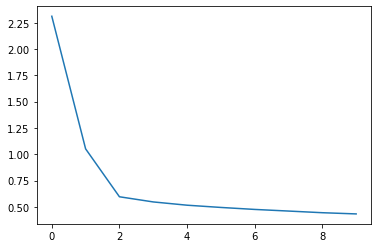

In [103]:
plt.plot(history_cnn.history['loss'])

In [104]:
y_pred = model.predict_classes(X_test_3)
con_mat = tf.math.confusion_matrix(labels = Y_test_original, predictions = y_pred).numpy()

In [105]:
print(con_mat)

[[829   5  16  51   4   1  79   0  15   0]
 [  2 961   2  25   5   0   4   0   1   0]
 [ 16   1 730  11 166   0  66   0  10   0]
 [ 28  20  17 880  29   0  21   0   5   0]
 [  1   2  95  51 776   0  72   0   3   0]
 [  0   0   0   1   0 950   0  34   1  14]
 [173   1 107  42  95   0 553   0  29   0]
 [  0   0   0   0   0  20   0 934   0  46]
 [  2   2   5   5   4   1   1   4 975   1]
 [  0   0   0   0   0   5   0  38   1 956]]


In [106]:
accuracy = accuracy_score(Y_test_original, y_pred)
print(accuracy)

0.8544
